<a href="https://colab.research.google.com/github/stevengregori92/Learn-TimeSeriesForecast/blob/main/ETS_for_House_Sales_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install luwiji
!pip install -q kaggle

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 40.3/40.3 MB 7.5 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 100.3/100.3 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 46.4 MB/s eta 0:00:00
  Created wheel for luwiji: filename=luwiji-1.2.1-py2.py3-none-any.whl size=40366828 sha256=cff972c2c20a09d8bd790da3ab85cb2a601f3396d72b6b215db61df642377c63
  Stored in directory: /root/.cache/pip/wheels/ba/90/9e/943ac5067e9cdc185d8f029a1d13278acd52839118acc06c9a
  Created wheel for jcopml: filename=jcopml-1.2.2-py2.py3-none-any.whl size=32177 sha256=8b739c5e7e72f97fa4bc3e1324fd63277651810466ef06372c347c2c84467172
  Stored in directory: /root/.cache/pip/wheels/5e/06/58/749e5f1baf2932285758798a92793d4347888826160b025808
Successfully built luwiji jcopml


In [2]:
# Import kaggle API
from google.colab import files
files.upload()

! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle
! chmod 600 ~/.kaggle/kaggle.json

Saving kaggle.json to kaggle.json


In [3]:
!kaggle datasets download -d htagholdings/property-sales
!unzip property-sales.zip
!rm property-sales.zip

  0% 0.00/162k [00:00<?, ?B/s]
100% 162k/162k [00:00<00:00, 95.7MB/s]
Archive:  property-sales.zip
  inflating: ma_lga_12345.csv        
  inflating: raw_sales.csv           


In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from jcopml.time_series import auto_ets

<Axes: xlabel='datesold'>

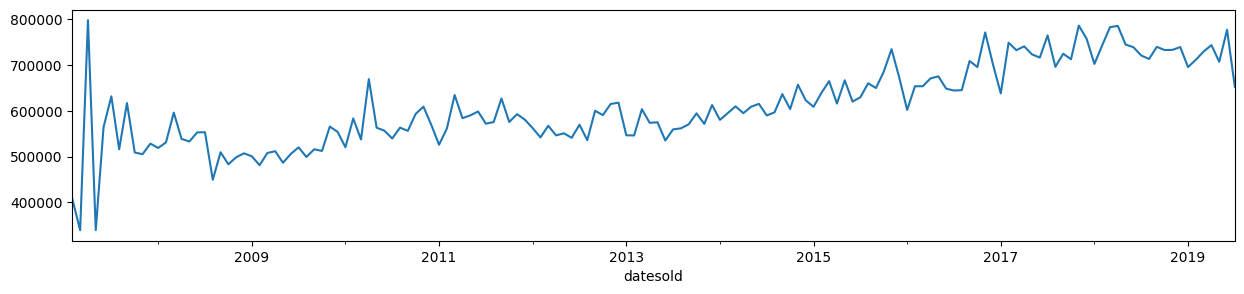

In [15]:
df = pd.read_csv('raw_sales.csv', index_col='datesold', parse_dates=['datesold'])
df = df[df['propertyType'] != 'unit']
df = df.resample('M').mean(numeric_only=True)
series = df.price
X_train, X_test = series[:-25], series[-25:]
series.plot(figsize=(15,3))

###Training

In [16]:
model, cv_results = auto_ets(X_train, scoring='mse')

  0%|          | 0/30 [00:00<?, ?it/s]

In [17]:
cv_results.head()

,trend,seasonal,damped,boxcox,mse_0,mse_1,mse_2,mse_3,mean_mse
0,None,None,False,True,3.016815e+09,6.500294e+08,1.691326e+09,3.845486e+09,2.300914e+09
1,None,None,False,False,4.205835e+09,6.512001e+08,1.695750e+09,3.800763e+09,2.588387e+09
23,mul,add,False,True,4.114152e+09,2.009106e+09,2.433466e+09,2.117157e+09,2.668470e+09
24,mul,add,False,False,4.975001e+09,1.966734e+09,1.960336e+09,2.640437e+09,2.885627e+09
13,add,add,False,False,5.007253e+09,1.967633e+09,1.950518e+09,2.746301e+09,2.917926e+09


##Forecast

In [20]:
pred = model.predict(len(X_train)-50, len(X_train)+50)

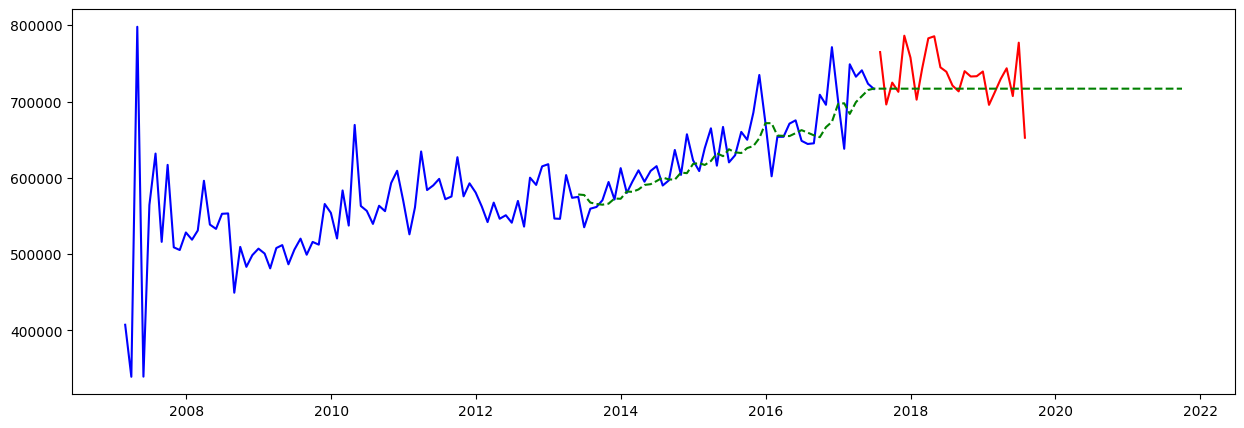

In [21]:
plt.figure(figsize=(15,5))
plt.plot(X_train, 'b-', label='Train')
plt.plot(X_test, 'r-', label='Test')
plt.plot(pred, 'g--', label='Forecast')